In [68]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

In [96]:
import seaborn as sns

In [69]:
import matplotlib.pyplot as plt

In [70]:
pr = Project('ELASTIC')

In [3]:
bulk = pr.create.structure.bulk('Fe', cubic=True).repeat(10)

In [4]:
lmp = pr.create.job.Lammps('lmp_md')
lmp.structure = bulk
lmp.calc_md(temperature=300, n_print=1000)
# lmp.input.control.measure_mean_value('pressures')
lmp.interactive_open()
elast = lmp.create_job('ElasticTensor', 'elast')
elast.run()

The job elast was saved and received the ID: 15910894


/u/samsstud/dev_sam/pyiron_atomistics/pyiron_atomistics/lammps/base.py:262: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job elast_lmp_md was saved and received the ID: 15910895


/u/samsstud/dev_sam/pyiron_atomistics/pyiron_atomistics/lammps/interactive.py:378: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  "Warning: setting upper trangular matrix might slow down the calculation"
/u/samsstud/dev_sam/pyiron_atomistics/pyiron_atomistics/lammps/interactive.py:107: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  "Warning: setting upper trangular matrix might slow down the calculation"


In [4]:
lmp = pr.create.job.Lammps('lmp_md')
lmp.structure = bulk
lmp.calc_md(temperature=300, n_print=1000)
lmp.input.control.measure_mean_value('pressures')
lmp.interactive_open()
elast = lmp.create_job('ElasticTensor', 'elast')
elast.run()

The job elast was saved and received the ID: 3


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job elast_lmp_md was saved and received the ID: 4


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/interactive.py:480: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  "Warning: setting upper trangular matrix might slow down the calculation"
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/interactive.py:120: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  "Warning: setting upper trangular matrix might slow down the calculation"


In [9]:
elast['elast_lmp_md/output/generic']

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'species', 'steps', 'temperature', 'volume']}

In [5]:
np.round(elast['output/elastic_tensor'])

array([[256., 163., 163.,  -0.,  -0.,  -0.],
       [164., 256., 163.,   0.,  -0.,   0.],
       [163., 164., 255.,   0.,   0.,  -0.],
       [  0.,  -0.,  -0., 133.,   0.,   0.],
       [ -0.,  -0.,   0.,  -0., 133.,  -0.],
       [ -0.,   0.,  -0.,   0.,  -0., 133.]])

In [78]:
lmp = pr.create.job.Lammps('lmp_md_test', delete_existing_job=True)
lmp.structure = bulk
lmp.calc_md(temperature=300, n_ionic_steps=10_000, n_print=1000)
# lmp.input.control['thermotime'] = 100
lmp.input.control.measure_mean_value('pressures')
lmp.interactive_open()
lmp.run()
lmp.interactive_close()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job lmp_md_test was saved and received the ID: 30


In [81]:
lmp['output/generic']

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'species', 'steps', 'temperature', 'volume']}

In [82]:
lmp['output/interactive']

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'species', 'steps', 'temperature', 'volume']}

In [80]:
lmp['output/generic/mean_pressures'].shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [56]:
lmp['output/generic/pressures'][1:, 0, 0].mean(), lmp['output/generic/mean_pressures'][1:, 0, 0].mean()

(1.0473632422885342, 1.0383600912628659)

In [58]:
!du -sh {lmp.working_directory}

1.7M	/home/jovyan/ELASTIC/lmp_md_test_hdf5/lmp_md_test


(array([[2., 2., 2., 1., 2., 0., 0., 0., 0., 1.],
        [0., 4., 5., 1., 0., 0., 0., 0., 0., 0.]]),
 array([1.00808546, 1.02118592, 1.03428637, 1.04738682, 1.06048727,
        1.07358772, 1.08668817, 1.09978862, 1.11288907, 1.12598952,
        1.13908997]),
 <a list of 2 BarContainer objects>)

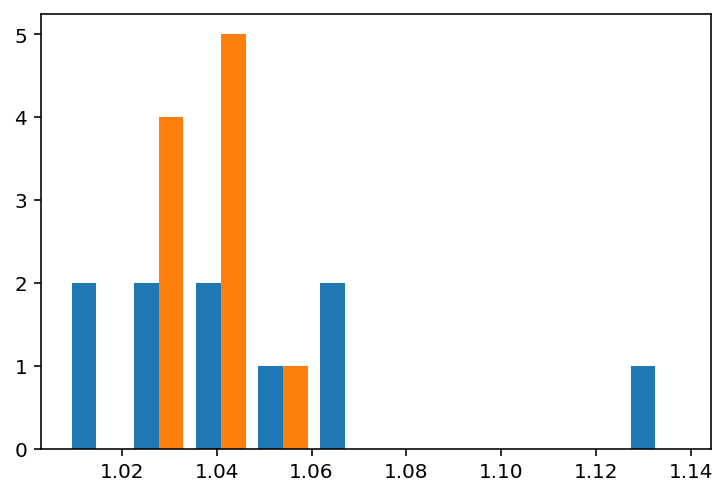

In [54]:
plt.hist([lmp['output/generic/pressures'][1:, 0, 0],
          lmp['output/generic/mean_pressures'][1:, 0, 0]], 
         bins=10)

(array([2., 2., 2., 1., 2., 0., 0., 0., 0., 1.]),
 array([1.00808546, 1.02118592, 1.03428637, 1.04738682, 1.06048727,
        1.07358772, 1.08668817, 1.09978862, 1.11288907, 1.12598952,
        1.13908997]),
 <BarContainer object of 10 artists>)

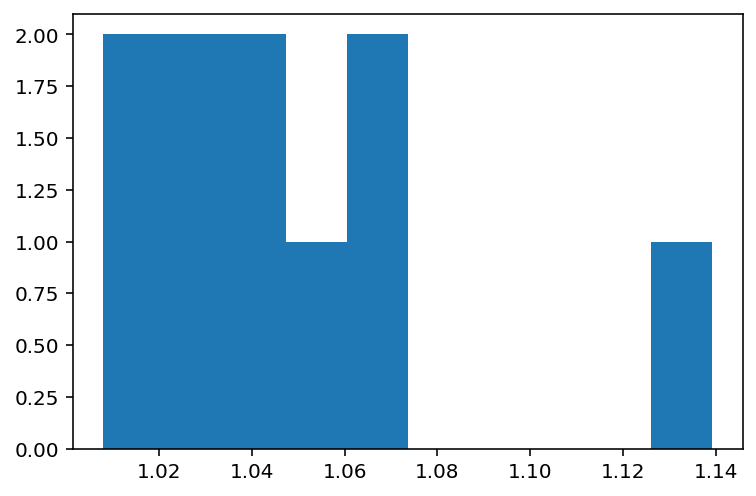

In [55]:
plt.hist(lmp['output/generic/pressures'][1:, 0, 0], bins=10)

# Modifying Tensor Here

In [71]:
from importlib import reload as re
import elastic_tensor_pressures as ETP

In [75]:
re(ETP)

<module 'elastic_tensor_pressures' from '/home/jovyan/elastic_tensor_pressures.py'>

In [77]:
lmp = pr.create.job.Lammps('lmp_md')
lmp.structure = bulk
lmp.calc_md(temperature=300, n_print=1000)
lmp.input.control.measure_mean_value('pressures')
#lmp.interactive_open()
elast = lmp.create_job(ETP.ElasticTensorPressures, 'elast_test', delete_existing_job=True)
elast.input['pressure_path'] = 'mean_pressures'
elast.run()

The job elast_test was saved and received the ID: 6
The job elast_test_0 was saved and received the ID: 7
The job elast_test_1 was saved and received the ID: 8
The job elast_test_2 was saved and received the ID: 9
The job elast_test_3 was saved and received the ID: 10
The job elast_test_4 was saved and received the ID: 11
The job elast_test_5 was saved and received the ID: 12
The job elast_test_6 was saved and received the ID: 13
The job elast_test_7 was saved and received the ID: 14
The job elast_test_8 was saved and received the ID: 15
The job elast_test_9 was saved and received the ID: 16
The job elast_test_10 was saved and received the ID: 17
The job elast_test_11 was saved and received the ID: 18
The job elast_test_12 was saved and received the ID: 19
The job elast_test_13 was saved and received the ID: 20
The job elast_test_14 was saved and received the ID: 21
The job elast_test_15 was saved and received the ID: 22
The job elast_test_16 was saved and received the ID: 23
The job e

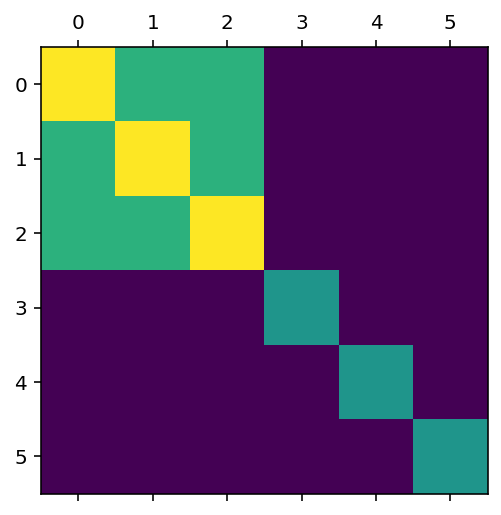

In [85]:
plt.matshow(
    elast['output/elastic_tensor']
)

## Changes with Temperature

### Get Thermal Expansion

In [99]:
Ts = np.linspace(100, 1000, 10)
for T in Ts:
    job = pr.create_group('thermal_expansion').create.job.Lammps([bulk, T], delete_existing_job=True)
    if job.status.initialized:
        job.structure = bulk
        job.calc_md(pressure=0, temperature=T, n_ionic_steps=10_000)
        job.run()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_100d0 was saved and received the ID: 42
The job Fe2000_200d0 was saved and received the ID: 43
The job Fe2000_300d0 was saved and received the ID: 44
The job Fe2000_400d0 was saved and received the ID: 45
The job Fe2000_500d0 was saved and received the ID: 46
The job Fe2000_600d0 was saved and received the ID: 47
The job Fe2000_700d0 was saved and received the ID: 48
The job Fe2000_800d0 was saved and received the ID: 49
The job Fe2000_900d0 was saved and received the ID: 50
The job Fe2000_1000d0 was saved and received the ID: 51


In [100]:
tab = pr.create_group('thermal_expansion').create_table('expansion_table', delete_existing_job=True)
tab.db_filter_function = lambda df: df.hamilton == 'Lammps'
tab.add['T'] = lambda j: j['input/generic/data_dict']['Value'][2]
tab.add['V'] = lambda j: j['output/generic/volume'][5:].mean() / j['input/structure/indices'].shape[0]
tab.run()
df = tab.get_dataframe()
df

The job expansion_table was saved and received the ID: 52


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

,job_id,T,V
0,42,100.0,11.816544
1,43,200.0,11.850675
2,44,300.0,11.884755
3,45,400.0,11.917879
4,46,500.0,11.951880
5,47,600.0,11.985249
6,48,700.0,12.019333
7,49,800.0,12.053059
8,50,900.0,12.088574
9,51,1000.0,12.125504


<AxesSubplot:xlabel='T', ylabel='V'>

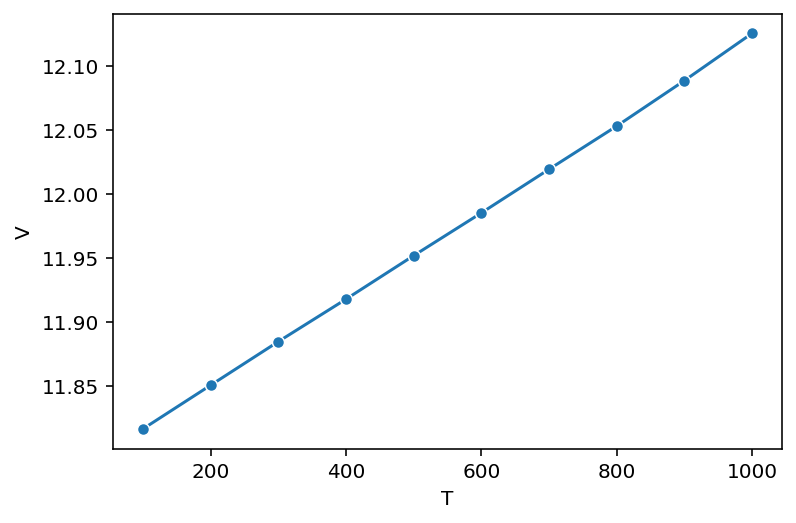

In [102]:
sns.lineplot(data=df, x='T', y='V', marker='o')

In [106]:
V_of_T = np.poly1d(np.polyfit(df['T'], df['V'], deg=1))

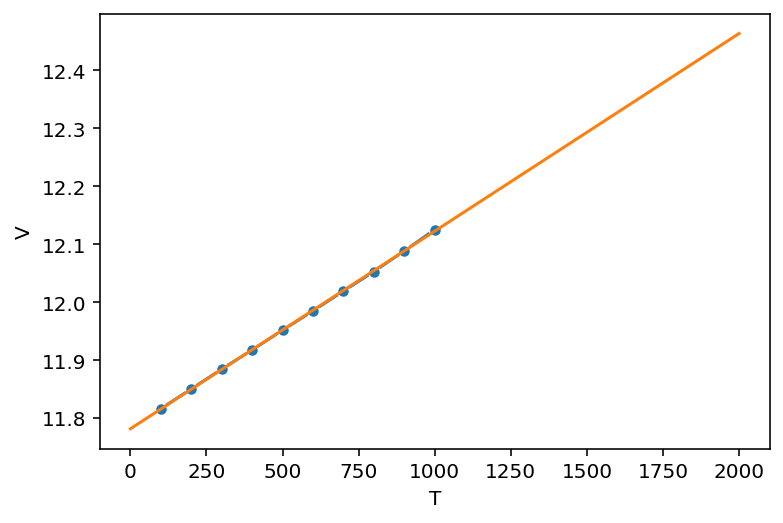

In [107]:
sns.lineplot(data=df, x='T', y='V', marker='o')
ti = np.linspace(0, 2000)
plt.plot(ti, V_of_T(ti))

### Actual Calculation

In [109]:
def calc_elastic(bulk, V, T, delete_existing_job=False, pr=pr):
    pr = pr.create_group('elastic')
    
    V0 = bulk.get_volume(per_atom=True)
    bulk = bulk.apply_strain( (V/V0)**(1/3) - 1, return_box=True )
    
    lmp = pr.create.job.Lammps('lmp_md')
    lmp.structure = bulk
    lmp.calc_md(temperature=T, n_print=1000)
    lmp.input.control.measure_mean_value('pressures')
    #lmp.interactive_open()
    elast = lmp.create_job(ETP.ElasticTensorPressures, f'{bulk}_T{T}K'.replace('.', '_'), delete_existing_job=delete_existing_job)
    elast.input['pressure_path'] = 'mean_pressures'
    elast.run()
    return elast

In [110]:
Ts = np.linspace(100, 1000, 10)
for T in Ts:
    elast = calc_elastic(bulk, V_of_T(T), T)

The job Fe2000_T100_0K was saved and received the ID: 53


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T100_0K_0 was saved and received the ID: 54
The job Fe2000_T100_0K_1 was saved and received the ID: 55
The job Fe2000_T100_0K_2 was saved and received the ID: 56
The job Fe2000_T100_0K_3 was saved and received the ID: 57
The job Fe2000_T100_0K_4 was saved and received the ID: 58
The job Fe2000_T100_0K_5 was saved and received the ID: 59
The job Fe2000_T100_0K_6 was saved and received the ID: 60
The job Fe2000_T100_0K_7 was saved and received the ID: 61
The job Fe2000_T100_0K_8 was saved and received the ID: 62
The job Fe2000_T100_0K_9 was saved and received the ID: 63
The job Fe2000_T100_0K_10 was saved and received the ID: 64
The job Fe2000_T100_0K_11 was saved and received the ID: 65
The job Fe2000_T100_0K_12 was saved and received the ID: 66
The job Fe2000_T100_0K_13 was saved and received the ID: 67
The job Fe2000_T100_0K_14 was saved and received the ID: 68
The job Fe2000_T100_0K_15 was saved and received the ID: 69
The job Fe2000_T100_0K_16 was saved and received t

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T200_0K_0 was saved and received the ID: 78
The job Fe2000_T200_0K_1 was saved and received the ID: 79
The job Fe2000_T200_0K_2 was saved and received the ID: 80
The job Fe2000_T200_0K_3 was saved and received the ID: 81
The job Fe2000_T200_0K_4 was saved and received the ID: 82
The job Fe2000_T200_0K_5 was saved and received the ID: 83
The job Fe2000_T200_0K_6 was saved and received the ID: 84
The job Fe2000_T200_0K_7 was saved and received the ID: 85
The job Fe2000_T200_0K_8 was saved and received the ID: 86
The job Fe2000_T200_0K_9 was saved and received the ID: 87
The job Fe2000_T200_0K_10 was saved and received the ID: 88
The job Fe2000_T200_0K_11 was saved and received the ID: 89
The job Fe2000_T200_0K_12 was saved and received the ID: 90
The job Fe2000_T200_0K_13 was saved and received the ID: 91
The job Fe2000_T200_0K_14 was saved and received the ID: 92
The job Fe2000_T200_0K_15 was saved and received the ID: 93
The job Fe2000_T200_0K_16 was saved and received t

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T300_0K_0 was saved and received the ID: 102
The job Fe2000_T300_0K_1 was saved and received the ID: 103
The job Fe2000_T300_0K_2 was saved and received the ID: 104
The job Fe2000_T300_0K_3 was saved and received the ID: 105
The job Fe2000_T300_0K_4 was saved and received the ID: 106
The job Fe2000_T300_0K_5 was saved and received the ID: 107
The job Fe2000_T300_0K_6 was saved and received the ID: 108
The job Fe2000_T300_0K_7 was saved and received the ID: 109
The job Fe2000_T300_0K_8 was saved and received the ID: 110
The job Fe2000_T300_0K_9 was saved and received the ID: 111
The job Fe2000_T300_0K_10 was saved and received the ID: 112
The job Fe2000_T300_0K_11 was saved and received the ID: 113
The job Fe2000_T300_0K_12 was saved and received the ID: 114
The job Fe2000_T300_0K_13 was saved and received the ID: 115
The job Fe2000_T300_0K_14 was saved and received the ID: 116
The job Fe2000_T300_0K_15 was saved and received the ID: 117
The job Fe2000_T300_0K_16 was save

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T400_0K_0 was saved and received the ID: 126
The job Fe2000_T400_0K_1 was saved and received the ID: 127
The job Fe2000_T400_0K_2 was saved and received the ID: 128
The job Fe2000_T400_0K_3 was saved and received the ID: 129
The job Fe2000_T400_0K_4 was saved and received the ID: 130
The job Fe2000_T400_0K_5 was saved and received the ID: 131
The job Fe2000_T400_0K_6 was saved and received the ID: 132
The job Fe2000_T400_0K_7 was saved and received the ID: 133
The job Fe2000_T400_0K_8 was saved and received the ID: 134
The job Fe2000_T400_0K_9 was saved and received the ID: 135
The job Fe2000_T400_0K_10 was saved and received the ID: 136
The job Fe2000_T400_0K_11 was saved and received the ID: 137
The job Fe2000_T400_0K_12 was saved and received the ID: 138
The job Fe2000_T400_0K_13 was saved and received the ID: 139
The job Fe2000_T400_0K_14 was saved and received the ID: 140
The job Fe2000_T400_0K_15 was saved and received the ID: 141
The job Fe2000_T400_0K_16 was save

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T500_0K_0 was saved and received the ID: 150
The job Fe2000_T500_0K_1 was saved and received the ID: 151
The job Fe2000_T500_0K_2 was saved and received the ID: 152
The job Fe2000_T500_0K_3 was saved and received the ID: 153
The job Fe2000_T500_0K_4 was saved and received the ID: 154
The job Fe2000_T500_0K_5 was saved and received the ID: 155
The job Fe2000_T500_0K_6 was saved and received the ID: 156
The job Fe2000_T500_0K_7 was saved and received the ID: 157
The job Fe2000_T500_0K_8 was saved and received the ID: 158
The job Fe2000_T500_0K_9 was saved and received the ID: 159
The job Fe2000_T500_0K_10 was saved and received the ID: 160
The job Fe2000_T500_0K_11 was saved and received the ID: 161
The job Fe2000_T500_0K_12 was saved and received the ID: 162
The job Fe2000_T500_0K_13 was saved and received the ID: 163
The job Fe2000_T500_0K_14 was saved and received the ID: 164
The job Fe2000_T500_0K_15 was saved and received the ID: 165
The job Fe2000_T500_0K_16 was save

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T600_0K_0 was saved and received the ID: 174
The job Fe2000_T600_0K_1 was saved and received the ID: 175
The job Fe2000_T600_0K_2 was saved and received the ID: 176
The job Fe2000_T600_0K_3 was saved and received the ID: 177
The job Fe2000_T600_0K_4 was saved and received the ID: 178
The job Fe2000_T600_0K_5 was saved and received the ID: 179
The job Fe2000_T600_0K_6 was saved and received the ID: 180
The job Fe2000_T600_0K_7 was saved and received the ID: 181
The job Fe2000_T600_0K_8 was saved and received the ID: 182
The job Fe2000_T600_0K_9 was saved and received the ID: 183
The job Fe2000_T600_0K_10 was saved and received the ID: 184
The job Fe2000_T600_0K_11 was saved and received the ID: 185
The job Fe2000_T600_0K_12 was saved and received the ID: 186
The job Fe2000_T600_0K_13 was saved and received the ID: 187
The job Fe2000_T600_0K_14 was saved and received the ID: 188
The job Fe2000_T600_0K_15 was saved and received the ID: 189
The job Fe2000_T600_0K_16 was save

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T700_0K_0 was saved and received the ID: 198
The job Fe2000_T700_0K_1 was saved and received the ID: 199
The job Fe2000_T700_0K_2 was saved and received the ID: 200
The job Fe2000_T700_0K_3 was saved and received the ID: 201
The job Fe2000_T700_0K_4 was saved and received the ID: 202
The job Fe2000_T700_0K_5 was saved and received the ID: 203
The job Fe2000_T700_0K_6 was saved and received the ID: 204
The job Fe2000_T700_0K_7 was saved and received the ID: 205
The job Fe2000_T700_0K_8 was saved and received the ID: 206
The job Fe2000_T700_0K_9 was saved and received the ID: 207
The job Fe2000_T700_0K_10 was saved and received the ID: 208
The job Fe2000_T700_0K_11 was saved and received the ID: 209
The job Fe2000_T700_0K_12 was saved and received the ID: 210
The job Fe2000_T700_0K_13 was saved and received the ID: 211
The job Fe2000_T700_0K_14 was saved and received the ID: 212
The job Fe2000_T700_0K_15 was saved and received the ID: 213
The job Fe2000_T700_0K_16 was save

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T800_0K_0 was saved and received the ID: 222
The job Fe2000_T800_0K_1 was saved and received the ID: 223
The job Fe2000_T800_0K_2 was saved and received the ID: 224
The job Fe2000_T800_0K_3 was saved and received the ID: 225
The job Fe2000_T800_0K_4 was saved and received the ID: 226
The job Fe2000_T800_0K_5 was saved and received the ID: 227
The job Fe2000_T800_0K_6 was saved and received the ID: 228
The job Fe2000_T800_0K_7 was saved and received the ID: 229
The job Fe2000_T800_0K_8 was saved and received the ID: 230
The job Fe2000_T800_0K_9 was saved and received the ID: 231
The job Fe2000_T800_0K_10 was saved and received the ID: 232
The job Fe2000_T800_0K_11 was saved and received the ID: 233
The job Fe2000_T800_0K_12 was saved and received the ID: 234
The job Fe2000_T800_0K_13 was saved and received the ID: 235
The job Fe2000_T800_0K_14 was saved and received the ID: 236
The job Fe2000_T800_0K_15 was saved and received the ID: 237
The job Fe2000_T800_0K_16 was save

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T900_0K_0 was saved and received the ID: 246
The job Fe2000_T900_0K_1 was saved and received the ID: 247
The job Fe2000_T900_0K_2 was saved and received the ID: 248
The job Fe2000_T900_0K_3 was saved and received the ID: 249
The job Fe2000_T900_0K_4 was saved and received the ID: 250
The job Fe2000_T900_0K_5 was saved and received the ID: 251
The job Fe2000_T900_0K_6 was saved and received the ID: 252
The job Fe2000_T900_0K_7 was saved and received the ID: 253
The job Fe2000_T900_0K_8 was saved and received the ID: 254
The job Fe2000_T900_0K_9 was saved and received the ID: 255
The job Fe2000_T900_0K_10 was saved and received the ID: 256
The job Fe2000_T900_0K_11 was saved and received the ID: 257
The job Fe2000_T900_0K_12 was saved and received the ID: 258
The job Fe2000_T900_0K_13 was saved and received the ID: 259
The job Fe2000_T900_0K_14 was saved and received the ID: 260
The job Fe2000_T900_0K_15 was saved and received the ID: 261
The job Fe2000_T900_0K_16 was save

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:259: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job Fe2000_T1000_0K_0 was saved and received the ID: 270
The job Fe2000_T1000_0K_1 was saved and received the ID: 271
The job Fe2000_T1000_0K_2 was saved and received the ID: 272
The job Fe2000_T1000_0K_3 was saved and received the ID: 273
The job Fe2000_T1000_0K_4 was saved and received the ID: 274
The job Fe2000_T1000_0K_5 was saved and received the ID: 275
The job Fe2000_T1000_0K_6 was saved and received the ID: 276
The job Fe2000_T1000_0K_7 was saved and received the ID: 277
The job Fe2000_T1000_0K_8 was saved and received the ID: 278
The job Fe2000_T1000_0K_9 was saved and received the ID: 279
The job Fe2000_T1000_0K_10 was saved and received the ID: 280
The job Fe2000_T1000_0K_11 was saved and received the ID: 281
The job Fe2000_T1000_0K_12 was saved and received the ID: 282
The job Fe2000_T1000_0K_13 was saved and received the ID: 283
The job Fe2000_T1000_0K_14 was saved and received the ID: 284
The job Fe2000_T1000_0K_15 was saved and received the ID: 285
The job Fe2000_T10

In [114]:
pr['elastic/Fe2000_T100_0K/lmp_md/input']

{'groups': ['control_inp', 'generic', 'potential_inp', 'structure'], 'nodes': ['generic_dict', 'interactive']}

In [115]:
tab = pr.create_group('elastic').create_table('elastic_table', delete_existing_job=True)
tab.db_filter_function = lambda df: df.hamilton == 'ElasticTensorPressures'
tab.add['T'] = lambda j: j['lmp_md/input/generic/data_dict']['Value'][2]
tab.add['tensor'] = lambda j: j['output/elastic_tensor']
tab.run()
df = tab.get_dataframe()
df

The job elastic_table was saved and received the ID: 293


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:2718: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['tensor'], dtype='object')]

  encoding=encoding,


,job_id,T,tensor
0,53,100.0,"[[250.62776825004295, 155.82271909577665, 155.81940652968245, 0.004689312094091624, 0.004329573401152415, 0.00800571640510362], [155.82075516971776, 250.62997357805244, 155.8187277111408, 0.008401..."
1,77,200.0,"[[249.39407914323616, 157.73903833015504, 157.7301907827611, -0.01791014562807997, 0.018784300970942386, -0.001236578937413696], [157.738562807277, 249.39482238388854, 157.7316352631297, -0.009591..."
2,101,300.0,"[[247.15997548512732, 158.33085708638728, 158.33739106983725, 0.005933279942380433, 0.007022544072810448, -0.0014202714698121], [158.33577940056787, 247.15011450745163, 158.3397291148518, 0.006802..."
3,125,400.0,"[[243.77396152410438, 158.181984194385, 158.18119676532598, -0.0015389218248891684, 0.009859681843302019, 0.0028702353930687083], [158.1869379012641, 243.7698634344963, 158.1881478261676, 0.001603..."
4,149,500.0,"[[240.52010053893648, 158.11794825061128, 158.12566675024223, -0.003317803485821606, 0.012621486374742402, 0.0022337996706096], [158.12029940931626, 240.50693178591575, 158.12626394682815, 0.00429..."
5,173,600.0,"[[236.22179084409976, 157.33829642037716, 157.3429570400536, 0.0063573901169459955, 0.004587449551565887, -0.0024801091913150396], [157.34813641138425, 236.2044424418379, 157.34501309877598, 0.003..."
6,197,700.0,"[[231.69411708282362, 156.587395091737, 156.58746583466717, 0.012895658085901165, 0.015811611254329175, 0.007860796343622578], [156.5912688928217, 231.69073360354503, 156.59010157343718, -0.001525..."
7,221,800.0,"[[226.97773094554492, 155.20868693627983, 155.24941517323478, 0.014437346783742618, 0.021160920640604965, 0.004068149094782219], [155.2422955596483, 226.97027692980885, 155.23041971842235, -0.0028..."
8,245,900.0,"[[221.93571716529195, 154.3515110745394, 154.36578003186062, 0.02197343680702516, 0.019509519225315394, 0.00819728158028892], [154.3619197080949, 221.93410917225728, 154.34422998712557, -0.0009668..."
9,269,1000.0,"[[216.54414139977806, 152.92283416853897, 152.9850771571239, 0.02931293089934905, 0.020251830237071132, 0.016233293769178078], [152.9667131227826, 216.53048649359317, 152.93559585748466, 0.0041659..."


In [ ]:
df.tensor

$$
\epsilon = 1/3 * [1,1,1] \\
S \epsilon = \sigma
$$

In [129]:
df['C11'] = df.tensor.apply(lambda e: e[0, 0])
df['C44'] = df.tensor.apply(lambda e: e[3, 3])
df['C\''] = df.tensor.apply(lambda e: (e[0, 0] - e[0, 1])/2)
df['K'] = df.tensor.apply(lambda e: 1/(np.linalg.inv(e) @ [1, 1, 1, 0, 0, 0])[0])/3

<AxesSubplot:xlabel='T', ylabel="C'">

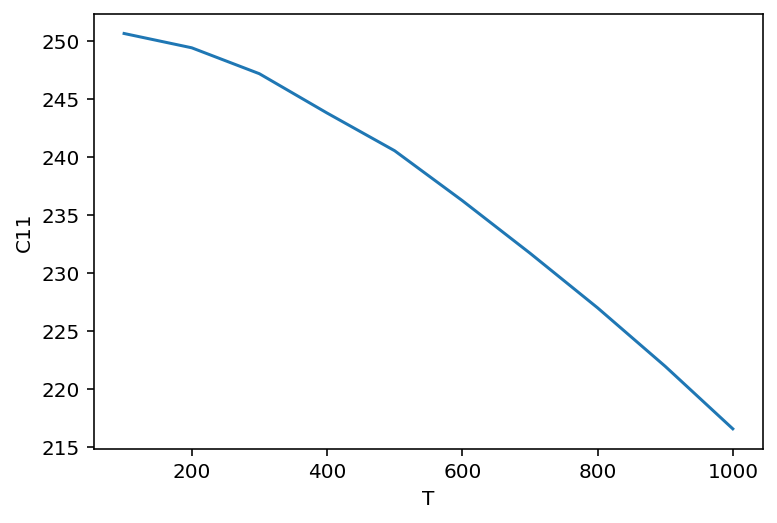

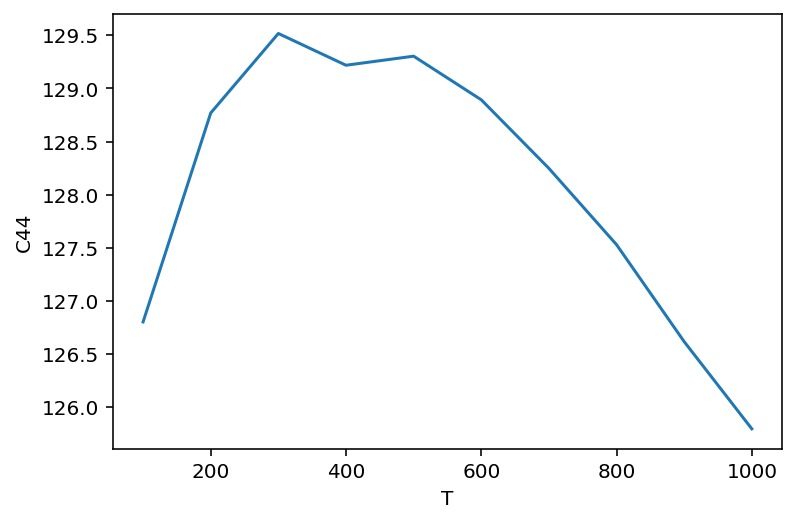

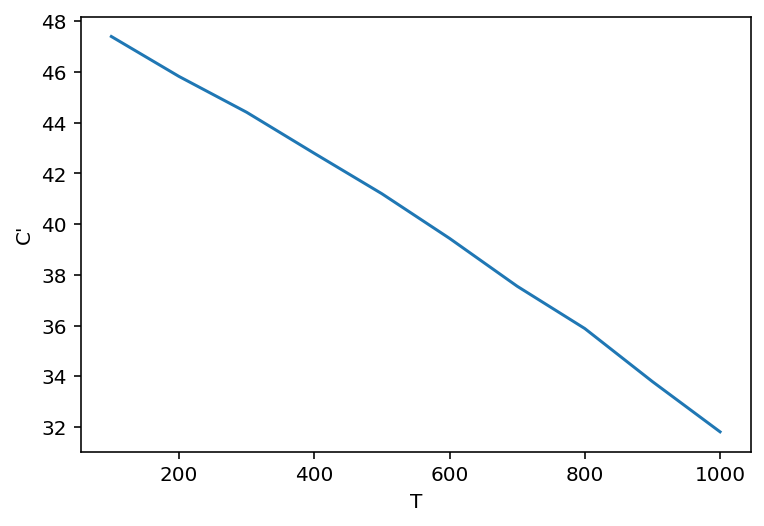

In [131]:
sns.lineplot(data=df,
             x='T', y='C11'
            )
plt.figure()
sns.lineplot(data=df,
             x='T', y='C44'
            )
plt.figure()
sns.lineplot(data=df,
             x='T', y='C\''
            )

<AxesSubplot:xlabel='T', ylabel='K'>

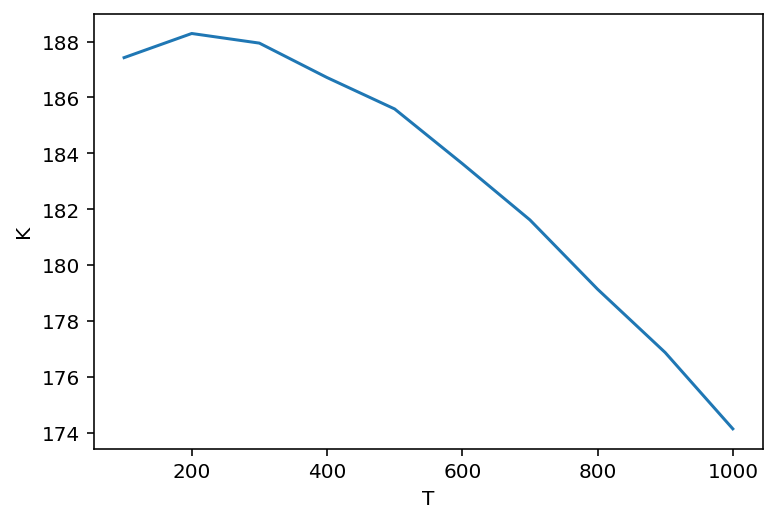

In [128]:
sns.lineplot(data=df,
             x='T', y='K'
            )